In [1]:
# from ortools.linear_solver import pywraplp
# from ortools.sat.python import cp_model
from Item import Item
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from k_means_constrained import KMeansConstrained
# import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# from sklearn_extra.cluster import KMedoids

In [2]:
items = [Item("religion",{"name":"","id":"N976474174","coordinate":{'lat': 41.00449, 'lon': 28.852695},"guestrating":"3"}),
           Item("shop",{"name":"","id":"N5175230621","coordinate":{'lat': 40.979065, 'lon': 28.854675},"guestrating":"1"}),
           Item("hotel",{"name":"","id":"487455","coordinate":{'lat': 40.9756, 'lon': 28.857127},"guestrating":"8.0"}),
           Item("shop",{"name":"","id":"N3536651095","coordinate":{'lat': 40.974094, 'lon': 28.867846},"guestrating":"2"}),
           Item("shop",{"name":"","id":"W162064941","coordinate":{'lat': 40.974113, 'lon': 28.868027},"guestrating":"2"}),
           Item("shop",{"name":"","id":"W162139987","coordinate":{'lat': 40.977695, 'lon': 28.873381},"guestrating":"2"}),
           Item("shop",{"name":"","id":"W388925021","coordinate":{'lat': 40.995335, 'lon': 28.909763},"guestrating":"2"}),
           Item("shop",{"name":"","id":"N5667655700","coordinate":{'lat': 40.995377, 'lon': 28.909706},"guestrating":"2"}),
           Item("historic",{"name":"","id":"W619276340","coordinate":{'lat': 40.993034, 'lon': 28.92271},"guestrating":"3"}),
           Item("historic",{"name":"","id":"W23273442","coordinate":{'lat': 40.996471, 'lon': 28.921476},"guestrating":"3"}),
           Item("historic",{"name":"","id":"W23272340","coordinate":{'lat': 40.99279, 'lon': 28.922642},"guestrating":"3"}),
           Item("religion",{"name":"","id":"Q1551419","coordinate":{'lat': 40.996113, 'lon': 28.928612},"guestrating":"3"}),
           Item("religion",{"name":"","id":"W329087345","coordinate":{'lat': 41.003357, 'lon': 28.928682},"guestrating":"3"}),
           Item("religion",{"name":"","id":"N4942262672","coordinate":{'lat': 41.004036, 'lon': 28.927195},"guestrating":"3"}),
           Item("cultural",{"name":"","id":"Q776353","coordinate":{'lat': 41.007801, 'lon': 28.9431},"guestrating":"3"}),
           Item("cultural",{"name":"","id":"N415157636","coordinate":{'lat': 41.005661, 'lon': 28.975103},"guestrating":"7"}),
           Item("historic",{"name":"","id":"N415157636","coordinate":{'lat': 41.005661, 'lon': 28.975103},"guestrating":"7"}),
           Item("cultural",{"name":"","id":"N4966376521","coordinate":{'lat': 41.045597, 'lon': 28.896212},"guestrating":"3"}),
           Item("religion",{"name":"","id":"W308038550","coordinate":{'lat': 41.006027, 'lon': 28.922728},"guestrating":"3"}),
           Item("religion",{"name":"","id":"N4504319791","coordinate":{'lat': 41.006756, 'lon': 28.915522},"guestrating":"3"}),
           Item("historic",{"name":"","id":"Q6078807","coordinate":{'lat': 40.993099, 'lon': 28.886101},"guestrating":"3"}),
           Item("cultural",{"name":"","id":"N1037084486","coordinate":{'lat': 40.964157, 'lon': 28.826265},"guestrating":"3"}),
           Item("historic",{"name":"","id":"Q6091148","coordinate":{'lat': 40.961559, 'lon': 28.81106},"guestrating":"3"}),
           Item("cultural",{"name":"","id":"Q5461957","coordinate":{'lat': 40.972599, 'lon': 28.782539},"guestrating":"3"}),
           Item("cultural",{"name":"","id":"W315607041","coordinate":{'lat': 40.964237, 'lon': 28.799963},"guestrating":"3"})]

In [3]:
data = pd.DataFrame({
#     'id':[item.item_id for item in items],
                     'lat':[item.coordinate['lat'] for item in items],
                    'lon':[item.coordinate['lon'] for item in items]})
data

,lat,lon
0,41.004490,28.852695
1,40.979065,28.854675
2,40.975600,28.857127
3,40.974094,28.867846
4,40.974113,28.868027
5,40.977695,28.873381
6,40.995335,28.909763
7,40.995377,28.909706
8,40.993034,28.922710
9,40.996471,28.921476


In [4]:
K_clusters = range(1,len(items)//3)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = data[['lat']]
X_axis = data[['lon']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

[-0.008531666490960358, -0.002718770557437649, -0.0008037199957334648, -0.0003625269833035624, -6.435878330352363e-05, -3.9951366970232526e-05, -2.6030338208343933e-05]


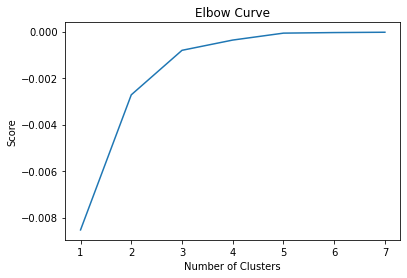

In [5]:
print(score)
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [33]:
kmeans = KMeansConstrained(n_clusters=5,init='k-means++',  size_min=5,size_max=5,)

In [34]:
data['label'] = kmeans.fit_predict(data)

In [35]:
data

,lat,lon,label
0,41.004490,28.852695,4
1,40.979065,28.854675,0
2,40.975600,28.857127,0
3,40.974094,28.867846,0
4,40.974113,28.868027,0
5,40.977695,28.873381,0
6,40.995335,28.909763,4
7,40.995377,28.909706,4
8,40.993034,28.922710,3
9,40.996471,28.921476,2


In [36]:
centers = kmeans.cluster_centers_ 

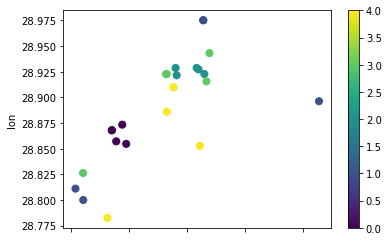

In [37]:
data.plot.scatter(x = 'lat', y = 'lon', c=data['label'], s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [38]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]


In [39]:
sorted_data = data.sort_values(by='label')

# [print(f"{d['lat']},{d['label']},") for i,d in sorted_data.iterrows()]
sorted_data

,lat,lon,label
1,40.979065,28.854675,0
2,40.975600,28.857127,0
3,40.974094,28.867846,0
4,40.974113,28.868027,0
5,40.977695,28.873381,0
24,40.964237,28.799963,1
22,40.961559,28.811060,1
17,41.045597,28.896212,1
16,41.005661,28.975103,1
15,41.005661,28.975103,1


In [40]:
import folium

In [41]:
m = folium.Map(location=[41.005661,28.975103])

In [42]:
[folium.Marker(
    location=[item['lat'],item['lon']],
    icon=folium.Icon(color=colors[int(item['label'])]),
    tooltip=item['label']
).add_to(m)  for i,item in sorted_data.iterrows()]

In [43]:

folium.PolyLine(locations=[[item['lat'],item['lon']] for i,item in data.iterrows() ],weight=5).add_to(m)
m

In [171]:

folium.PolyLine(locations=[[item['lat'],item['lon']] for i,item in sorted_data.iterrows() ],weight=5).add_to(m)
m

In [45]:
!pip install size-constrained-clustering


  Using cached size_constrained_clustering-0.1.1.tar.gz (52 kB)
    ERROR: Command errored out with exit status 1:
     command: /Users/ammar0ah/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/_d/tr5dsvjj5zx9d2v_wr7z_4s00000gn/T/pip-install-74wdty_c/size-constrained-clustering_7c60bdf0062c4c87b4d98e1e7fda3991/setup.py'"'"'; __file__='"'"'/private/var/folders/_d/tr5dsvjj5zx9d2v_wr7z_4s00000gn/T/pip-install-74wdty_c/size-constrained-clustering_7c60bdf0062c4c87b4d98e1e7fda3991/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/_d/tr5dsvjj5zx9d2v_wr7z_4s00000gn/T/pip-pip-egg-info-6d0lu9_c
         cwd: /private/var/folders/_d/tr5dsvjj5zx9d2v_wr7z_4s00000gn/T/pip-install-74wdty_c/size-constrained-clustering_7c60bdf0062c4c87b4d98e1e7fda3991/
    Complete output (11 lines):
  